In [301]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [302]:
insurance = pd.read_csv("/content/insurance.csv")

In [303]:
df = insurance.copy()

In [304]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [305]:
insurance.shape

(1338, 7)

In [306]:
df.info() # you can see the type of datas below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [307]:
# Now decribe all column

In [308]:
df["age"].describe().T

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [309]:
df["sex"].describe().T

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [310]:
df["bmi"].describe().T

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [311]:
df["children"].describe().T

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [312]:
df["smoker"].describe().T

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [313]:
df["region"].describe().T

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [314]:
df["charges"].describe().T

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

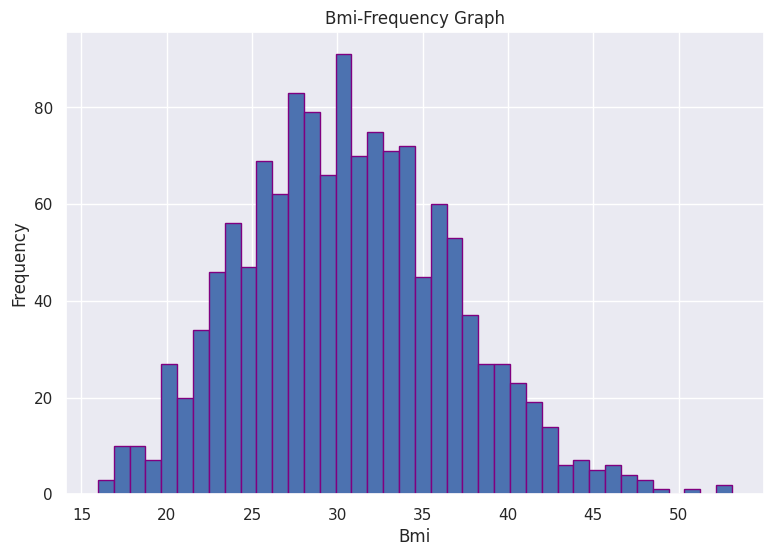

In [315]:
# Making graphic about frequency of bmi
sns.set(rc={"figure.figsize":(9,6)})
plt.figure(figsize=(9,6))
plt.hist(insurance["bmi"], bins=40,edgecolor = "Purple")
plt.title("Bmi-Frequency Graph")
plt.xlabel("Bmi")
plt.ylabel("Frequency")
plt.show()

In [316]:
median_bmi =np.median(insurance["bmi"])
print("Median of bmi is: ",median_bmi)

Median of bmi is:  30.4


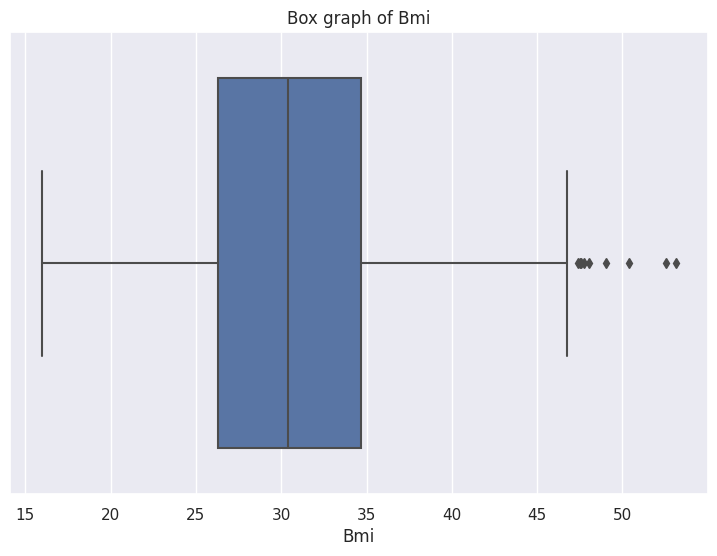

In [317]:
sns.set(rc={"figure.figsize":(9,6)})
sns.boxplot(x=insurance["bmi"])
plt.xlabel("Bmi")
plt.title("Box graph of Bmi")
plt.show()

In [318]:
df.duplicated().sum
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


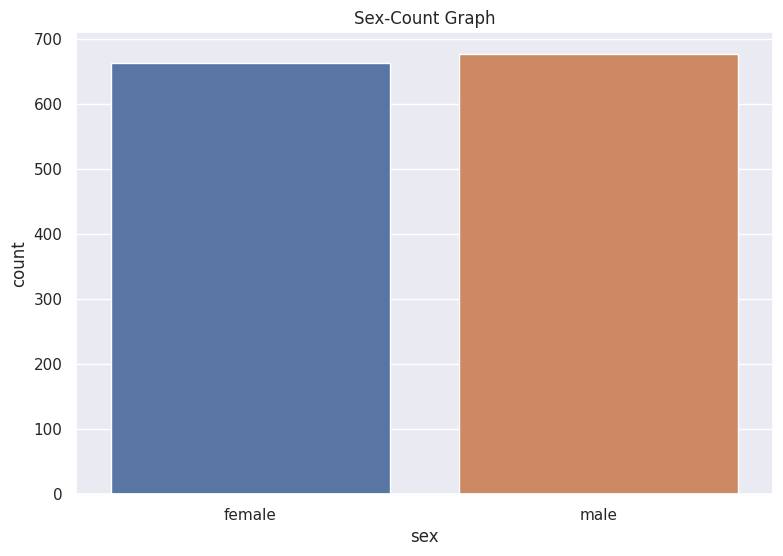

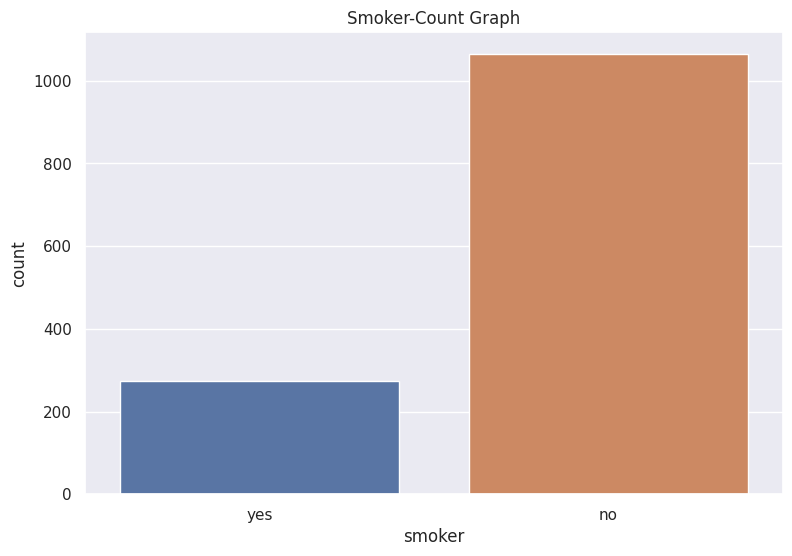

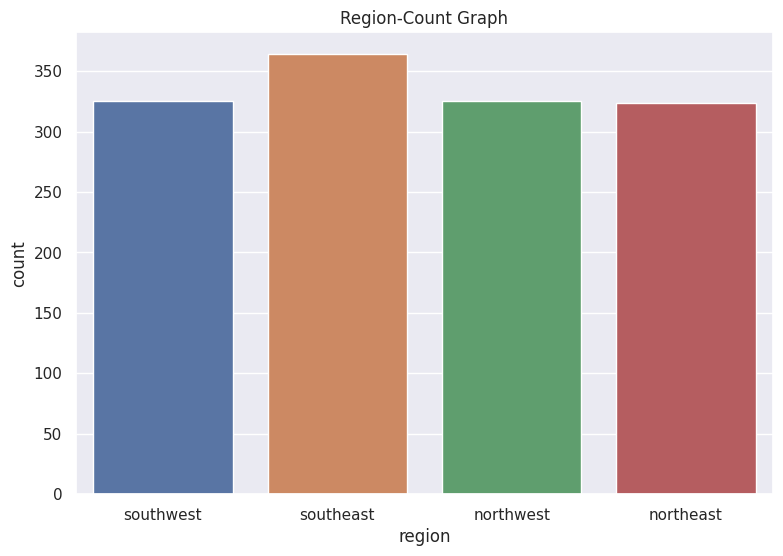

In [319]:
# We gonna take all featres and convert easy to use
# Gonna focus connection between Sex-Smoker and Region
features = df.select_dtypes("object").columns.to_list()
sns.set(rc={"figure.figsize":(9,6)})
i=1
for all_features in features:
  plt.title(f"{all_features.capitalize()}-Count Graph")
  sns.countplot(df,x = all_features)
  plt.show()

Text(0.5, 1.0, 'Smoke-Charges Graph')

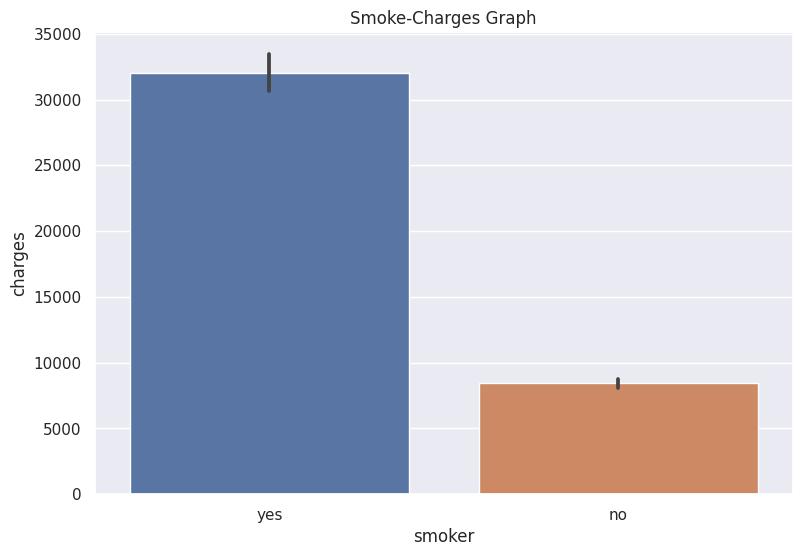

In [320]:
sns.set(rc={"figure.figsize":(9,6)})
sns.barplot(x="smoker",y="charges",data=insurance)
plt.title("Smoke-Charges Graph")

Sex,Smoker and Region - Charge graphs about affect
Sex
Sex-charge affect
        min_charges  mean_charges  max_charges
sex                                           
female    1607.5101  12569.578844  63770.42801
male      1121.8739  13956.751178  62592.87309


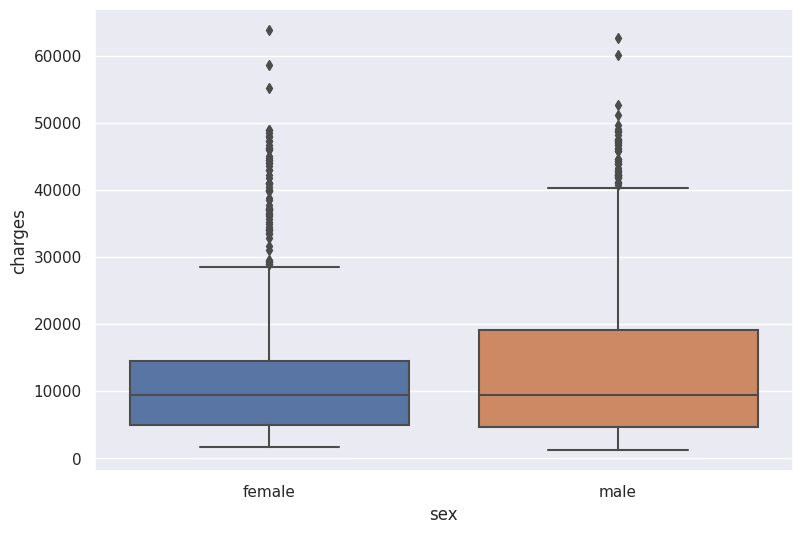

Smoker
Smoker-charge affect
        min_charges  mean_charges  max_charges
smoker                                        
no        1121.8739   8434.268298  36910.60803
yes      12829.4551  32050.231832  63770.42801


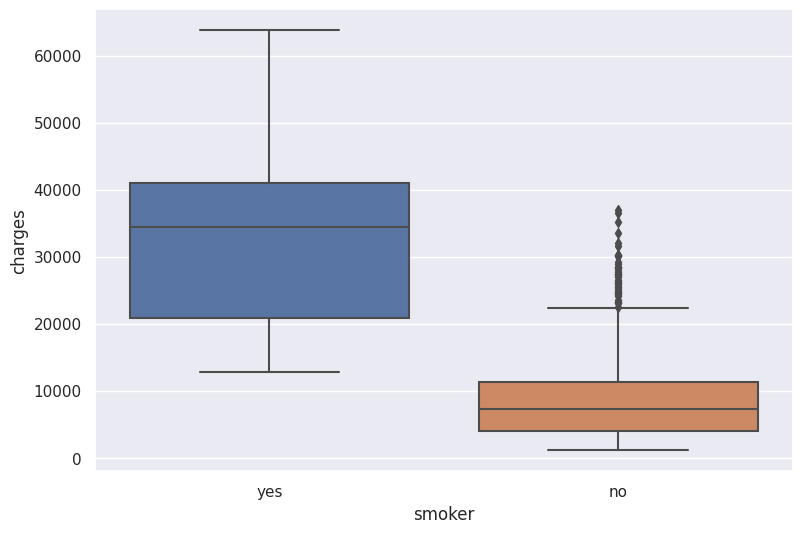

Region
Region-charge affect
           min_charges  mean_charges  max_charges
region                                           
northeast    1694.7964  13406.384516  58571.07448
northwest    1621.3402  12417.575374  60021.39897
southeast    1121.8739  14735.411438  63770.42801
southwest    1241.5650  12346.937377  52590.82939


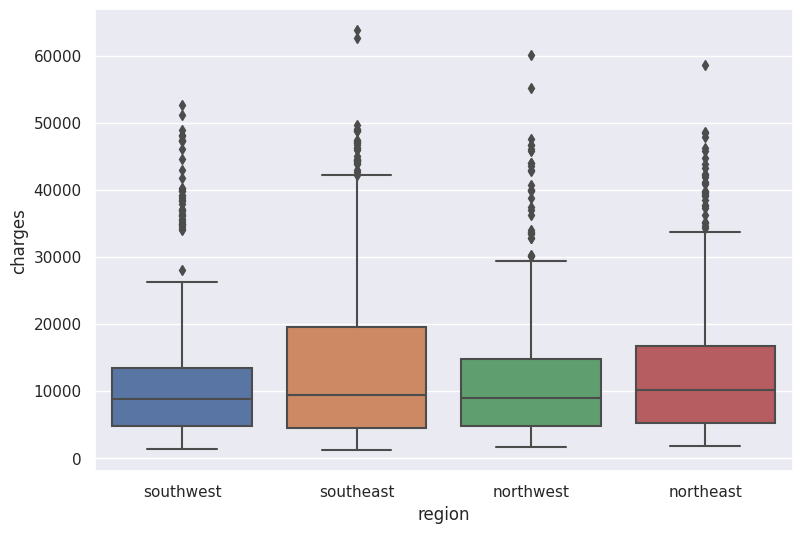

In [321]:
print("Sex,Smoker and Region - Charge graphs about affect")
for all_features in features:
  print(all_features.capitalize())
  print(f"{all_features.capitalize()}-charge affect")
  print(df.groupby(all_features).agg(min_charges=("charges","min"),mean_charges= ("charges","mean"),max_charges= ("charges","max")))

  sns.boxplot(df,x = all_features,y = "charges")
  plt.show()

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 1.0, 'Regio,Smoker-People Graph')

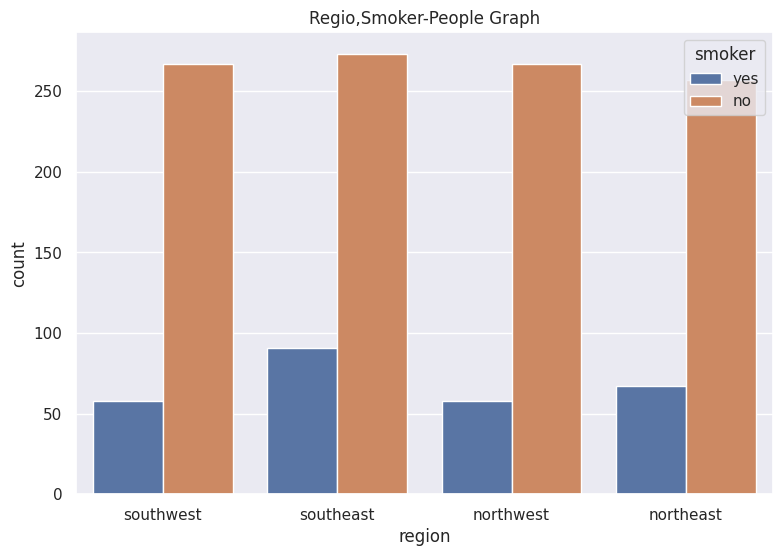

In [323]:
sns.set(rc={"figure.figsize":(9,6)})
sns.countplot(x = "region",data=insurance, hue = "smoker")
plt.title("Regio,Smoker-People Graph")

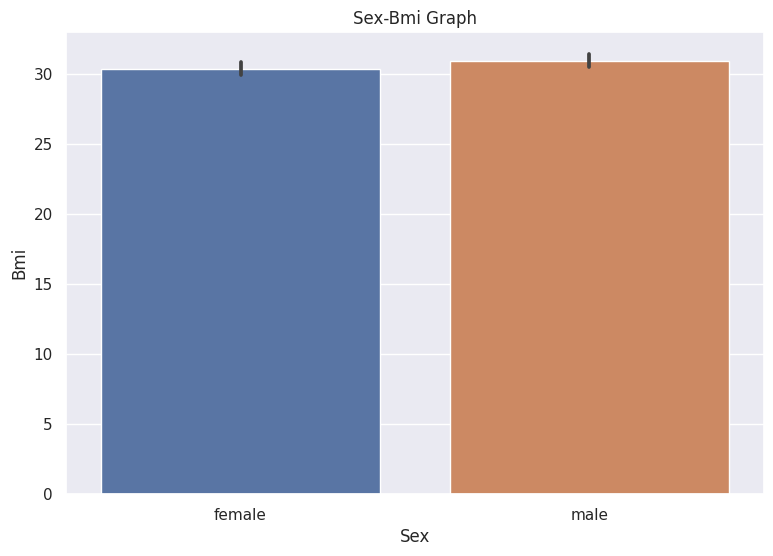

In [324]:
sns.set(rc={"figure.figsize":(9,6)})
plt.figure(figsize=(9,6))
plt.title("Sex-Bmi Graph")
sns.barplot(x="sex",y="bmi",data=insurance)
plt.xlabel("Sex")
plt.ylabel("Bmi")
plt.show()

In [325]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


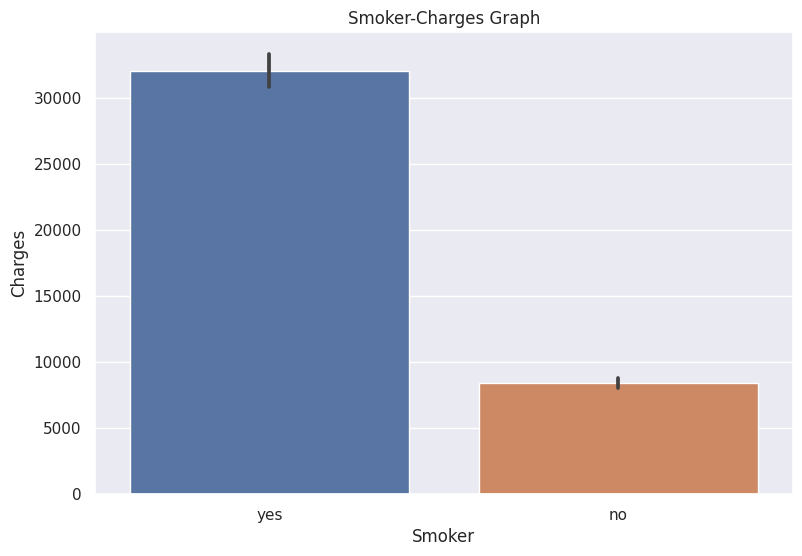

In [326]:
sns.set(rc={"figure.figsize":(9,6)})
plt.figure(figsize=(9,6))
plt.title("Smoker-Charges Graph")
sns.barplot(x="smoker",y="charges",data=insurance)
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

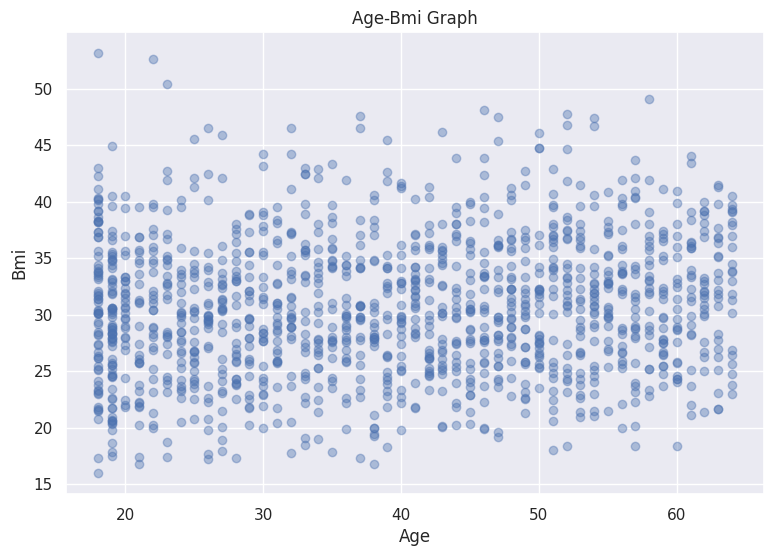

In [327]:
sns.set(rc={"figure.figsize":(9,6)})
plt.figure(figsize=(9,6))
plt.scatter(insurance["age"], insurance["bmi"], alpha = 0.4)
plt.title("Age-Bmi Graph")
plt.xlabel("Age")
plt.ylabel("Bmi")
plt.show()

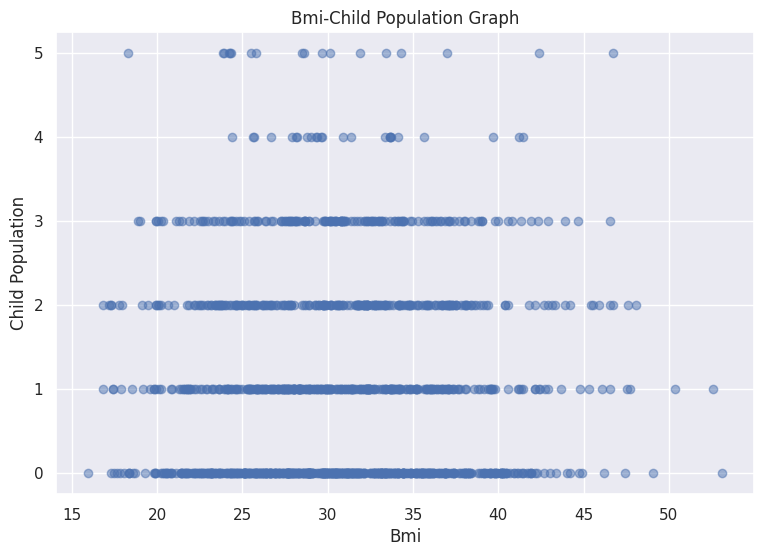

In [330]:
sns.set(rc={"figure.figsize":(9,6)})
plt.figure(figsize=(9,6))
plt.scatter(insurance["bmi"], insurance["children"], alpha=0.5)
plt.title("Bmi-Child Population Graph")
plt.xlabel("Bmi")
plt.ylabel("Child Population")
plt.show()

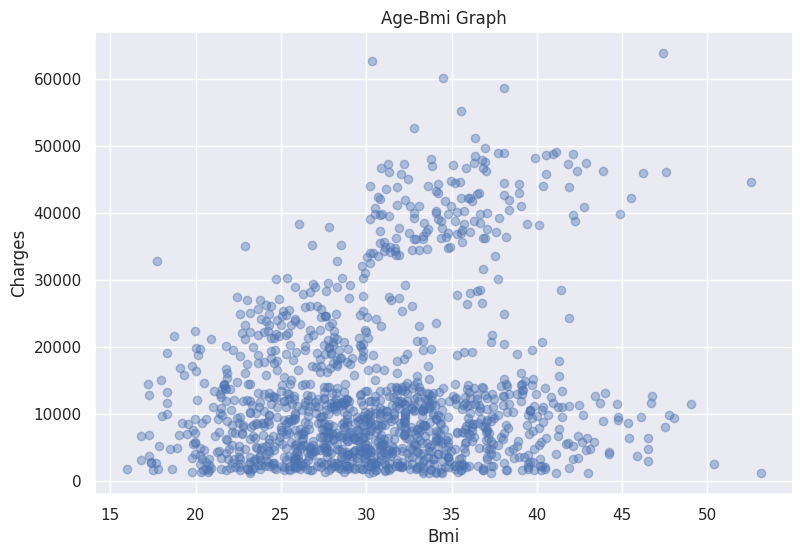

In [331]:
sns.set(rc={"figure.figsize":(9,6)})
plt.figure(figsize=(9,6))
plt.scatter(insurance["bmi"], insurance["charges"], alpha = 0.4)
plt.title("Age-Bmi Graph")
plt.xlabel("Bmi")
plt.ylabel("Charges")
plt.show()

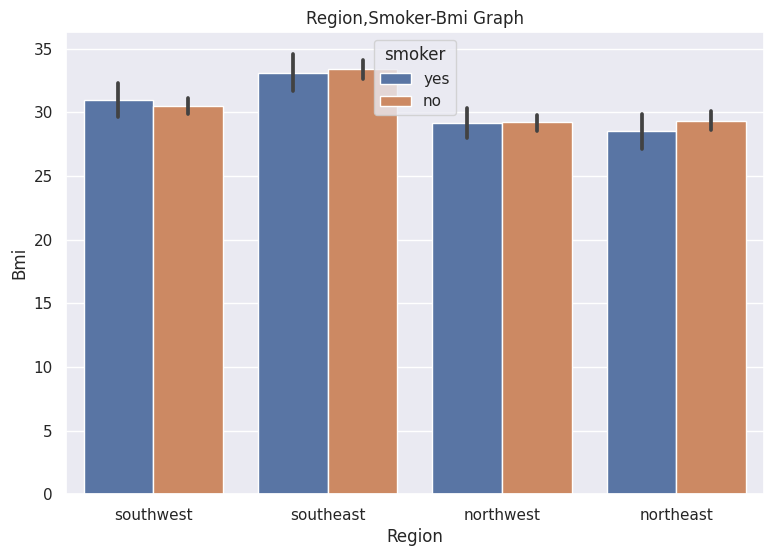

In [332]:
sns.set(rc={"figure.figsize":(9,6)})
sns.barplot(x="region", y="bmi", data=insurance, hue="smoker")
plt.title("Region,Smoker-Bmi Graph")
plt.xlabel("Region")
plt.ylabel("Bmi")
plt.show()

Data Preprocessing

In [333]:
encoded_data = insurance.copy()

In [334]:
encoded_data = pd.get_dummies(encoded_data, columns=["sex", "smoker", "region"], drop_first=True)
print(encoded_data.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [335]:
encoded_data_num = encoded_data.copy()
encoded_data_num = encoded_data_num.astype(int)
print(encoded_data_num.head())

   age  bmi  children  charges  sex_male  smoker_yes  region_northwest  \
0   19   27         0    16884         0           1                 0   
1   18   33         1     1725         1           0                 0   
2   28   33         3     4449         1           0                 0   
3   33   22         0    21984         1           0                 1   
4   32   28         0     3866         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [336]:
encoded_data_num.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [337]:
X = encoded_data_num.drop("charges", axis=1)  # Bağımsız değişkenler
y = encoded_data_num["charges"]  # Hedef değişken
# Veriyi train ve test setlere ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [338]:
#outlier variable?
z_scores = stats.zscore(df["bmi"])
threshold = 3
outliers = abs(z_scores) > threshold
outlier_val = df["bmi"][outliers]
print("Outlier values:", outlier_val)

Outlier values: 116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


In [339]:
clean_df = df[~outliers]
encode_df = pd.get_dummies(clean_df, columns=["region", "smoker", "sex"], prefix=["region", "smoker", "sex"])

In [340]:
X = encode_df.drop("charges", axis=1)
y = encode_df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection

In [341]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(encode_df.drop("charges", axis=1))
scaled_df = pd.DataFrame(X_scaled, columns=encode_df.drop("charges", axis=1).columns)

In [342]:
def crossval(model):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    forest_reg_rmse_scores = np.sqrt(-scores)
    print("cv : ")
    return forest_reg_rmse_scores.mean()

In [343]:
linear_regressor = LinearRegression()
linear_model = linear_regressor.fit(X_train,y_train)
linear_pred = linear_regressor.predict(X_test)
crossval(linear_model)

cv : 


6100.748864465365

In [344]:
encoded_data_num.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [345]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regression_model = DecisionTreeRegressor(max_depth=3, random_state=42)
decision_tree_regression_model = decision_tree_regressor.fit(X_train, y_train)
decision_tree_regression_pred = decision_tree_regression_model.predict(X_test)
crossval(decision_tree_regression_model)

cv : 


6547.054973033771

Hyper-parameter Optimization

In [350]:
param_grid = [
    { "n_estimators": [30, 40, 50, 60, 70, 80], "max_depth": [1, 3, 5, 7, 9] },
    { "bootstrap": [False], "n_estimators": [3, 8], "max_depth": [1, 3, 5, 7, 9]}
]

In [351]:
random_forest_regressor = RandomForestRegressor(random_state=38)
forest_grid_search = GridSearchCV(random_forest_regressor, param_grid, cv=6, scoring='neg_mean_squared_error', refit=True)
forest_grid_search.fit(X_scaled, y)
forest_grid_search.best_params_

{'max_depth': 5, 'n_estimators': 70}

Model Evaluation

In [352]:
all_of_the_best_model = forest_grid_search.best_estimator_
y_pred = all_of_the_best_model.predict(X_scaled)

In [353]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

final_scores = [mse,mae,r2]
final_scores_labels = ["mse","mae","r2"]

for i,j in zip(final_scores,final_scores_labels):
    print(f"{j} : {i}")

mse : 16463620.326376956
mae : 2254.868390121926
r2 : 0.8872744462862515
